<a href="https://colab.research.google.com/github/karthikmohan1702/EVA6/blob/main/S11_YOLO_V3/yolo_opencv/YOLO_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2021-07-26 19:08:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.11’

yolov3.weights.11   100%[===================>] 236.52M  71.4MB/s    in 3.5s    

2021-07-26 19:08:39 (67.1 MB/s) - ‘yolov3.weights.11’ saved [248007048/248007048]

--2021-07-26 19:08:39--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names.11’

coco.names.11       100%[===================>]     625  --.-KB/s    in 0s     

In [3]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(3000, 4000, 3)


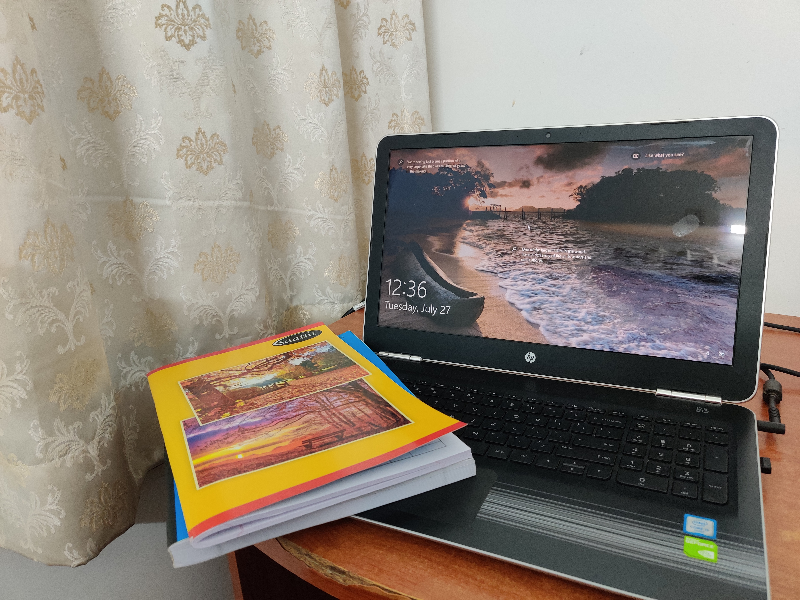

In [5]:
# Loading image
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/drive/MyDrive/ColabNotebooks/EVA_6/S11_YOLO/coco_test.jpg")
print(img.shape)
img = cv2.resize(img, None, fx=0.2, fy=0.2)
height, width, channels = img.shape
cv2_imshow(img)


In [6]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [7]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [8]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

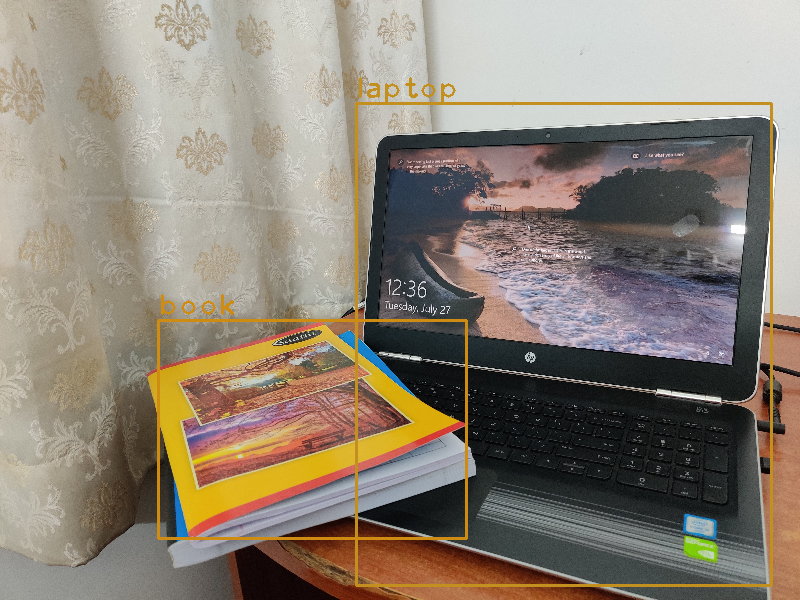

In [9]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y-5), font, 2, color, 2)


cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
cv2.imwrite("/content/drive/MyDrive/ColabNotebooks/EVA_6/S11_YOLO/yolo_detected_img.jpg", img)

True